# Dementia Classification

### Classification of dementia by parameters of structural medical images of the encephalon in conjunction with cognition tests


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df_long = pd.read_csv('oasis_longitudinal.csv')

In [3]:
# visualize the dataset
df_long

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


### The data inspection reveals missing information, highlighting the need to find a workaround to avoid losing data, especially since the sample size is limited.

## Available attributes and its defination:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

attribute_names = df_long.columns

definitions = [
    "Subject identification", "MRI identification", "Class", "Visit followup", 
    "MR contrast", "Gender", "Dominant hand", "Age", "Education level", "SES cognition test", 
    "MMSE cognition test", "CDR cognition test", "Estimated intracranial volume", 
    "Standardized brain volume", "Atlas factor scaling"
]

df_table = pd.DataFrame({
    "Attribute": attribute_names,
    "Definition": definitions
})

df_table

,Attribute,Definition
0,Subject ID,Subject identification
1,MRI ID,MRI identification
2,Group,Class
3,Visit,Visit followup
4,MR Delay,MR contrast
5,M/F,Gender
6,Hand,Dominant hand
7,Age,Age
8,EDUC,Education level
9,SES,SES cognition test


## Check Missing Values

In [5]:
df_long.isnull().values.any()

True

In [6]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df_long)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


In [7]:
df_long.isin([0]).sum()

Subject ID      0
MRI ID          0
Group           0
Visit           0
MR Delay      150
M/F             0
Hand            0
Age             0
EDUC            0
SES             0
MMSE            0
CDR           206
eTIV            0
nWBV            0
ASF             0
dtype: int64

## Fill the missing values with it's column's mean

In [8]:
df_long["SES"].fillna(df_long["SES"].mean(), inplace=True)
df_long["MMSE"].fillna(df_long["MMSE"].mean(), inplace=True)
nans(df_long)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF


## Visualize Data

In [9]:
!pip install seaborn


You should consider upgrading via the '/projectnb/vkolagrp/pengrui/myenv/bin/python -m pip install --upgrade pip' command.


In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def generate_chars(field):
    plt.figure()
    g = None
    if field == "MR Delay":
        df_query_mri = df_long[df_long["MR Delay"] > 0]
        g = sns.countplot(x = df_query_mri["MR Delay"], palette='pastel')
        g.figure.set_size_inches(18.5, 10.5)
    else:
        g = sns.countplot(x = df_long[field], palette='pastel')
        g.figure.set_size_inches(18.5, 10.5)
    
    sns.despine()


In [11]:
group_map = {"Demented": 1, "Nondemented": 0}
gender_map = {"M": 1, "F": 0}
hand_map = {"R": 1, "L": 0}

df_long['Group'] = df_long['Group'].replace(['Converted'], ['Demented'])

df_long['Group'] = df_long['Group'].map(group_map)
df_long['M/F'] = df_long['M/F'].map(gender_map)
df_long['Hand'] = df_long['Hand'].map(hand_map)


In [12]:
df_long


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,1,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,0,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,0,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323


/scratch/646967.1.cds-gpu/ipykernel_3114584/1296847747.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x = df_long[field], palette='pastel')
/scratch/646967.1.cds-gpu/ipykernel_3114584/1296847747.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x = df_long[field], palette='pastel')
/scratch/646967.1.cds-gpu/ipykernel_3114584/1296847747.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x = df_query_mri["MR Delay"], palette='pastel')
/scratch/646967.1.cds-gpu/ipykernel_3114584/1296847747.py:13: FutureWarning: 

Pa

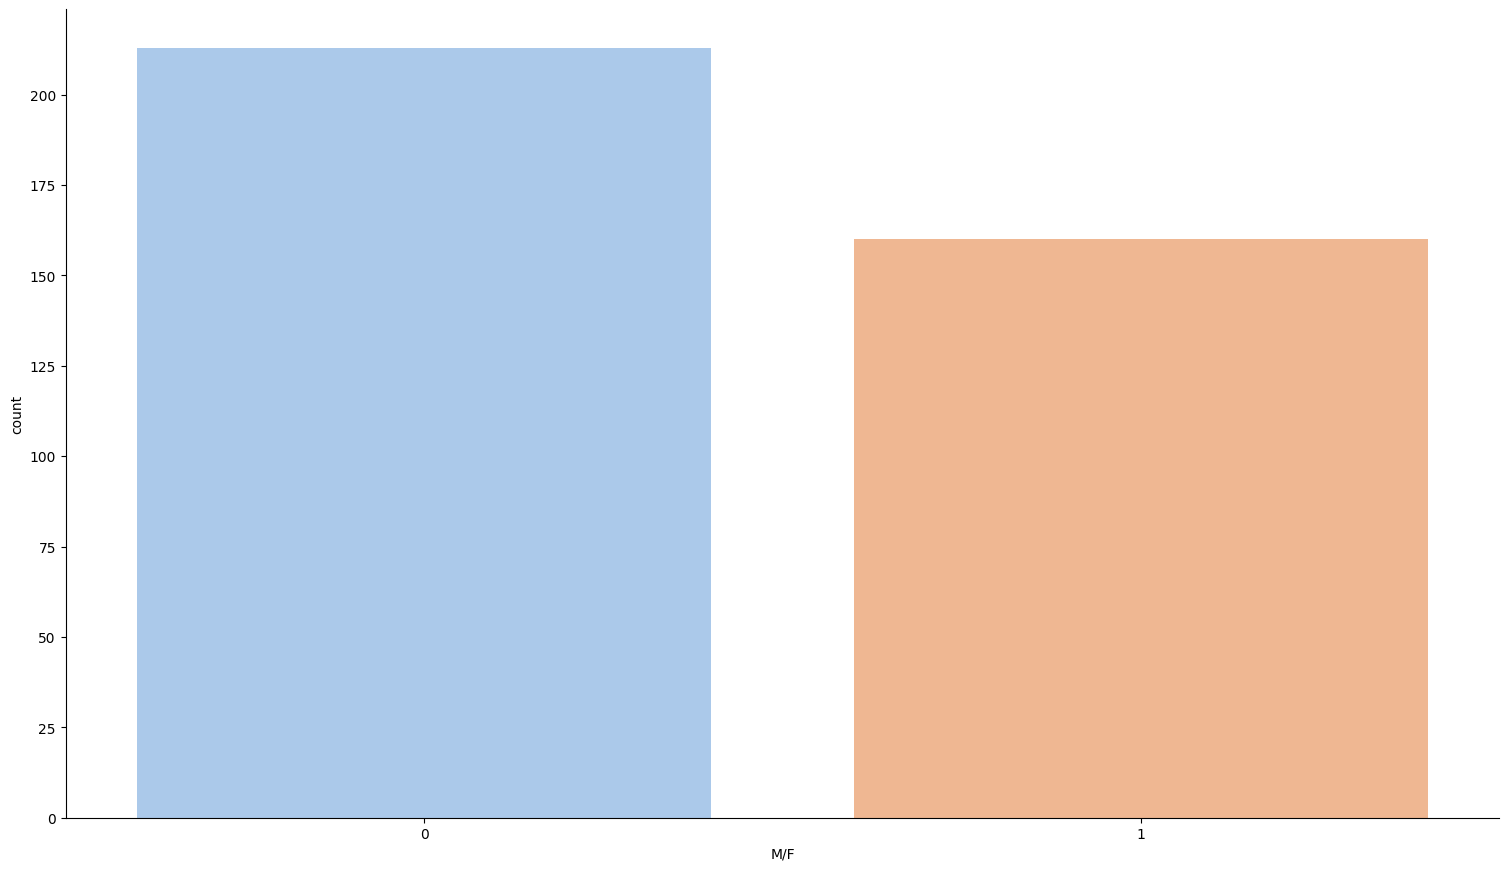

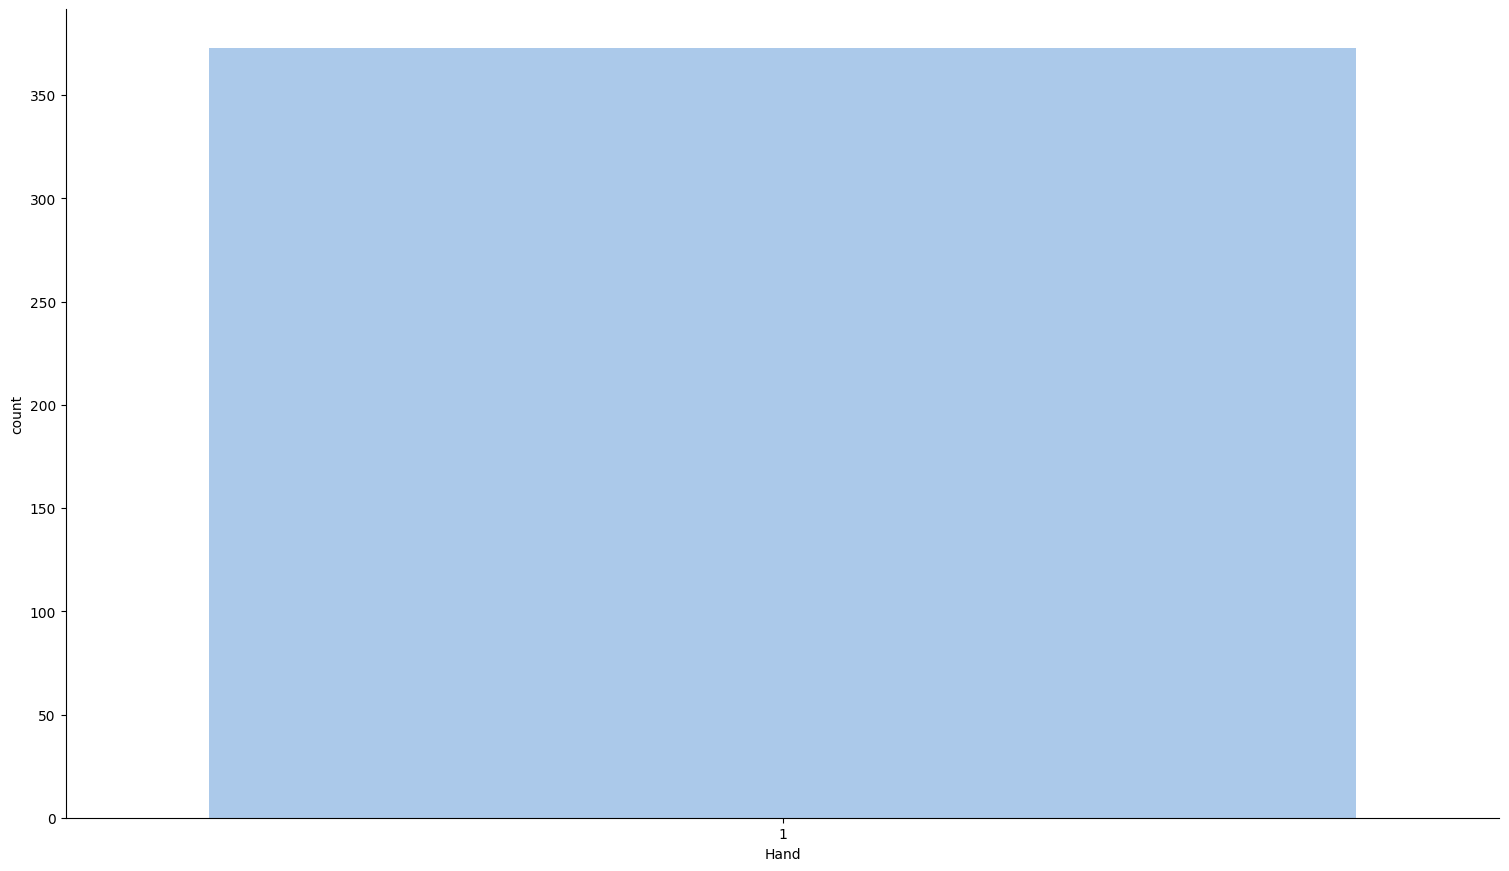

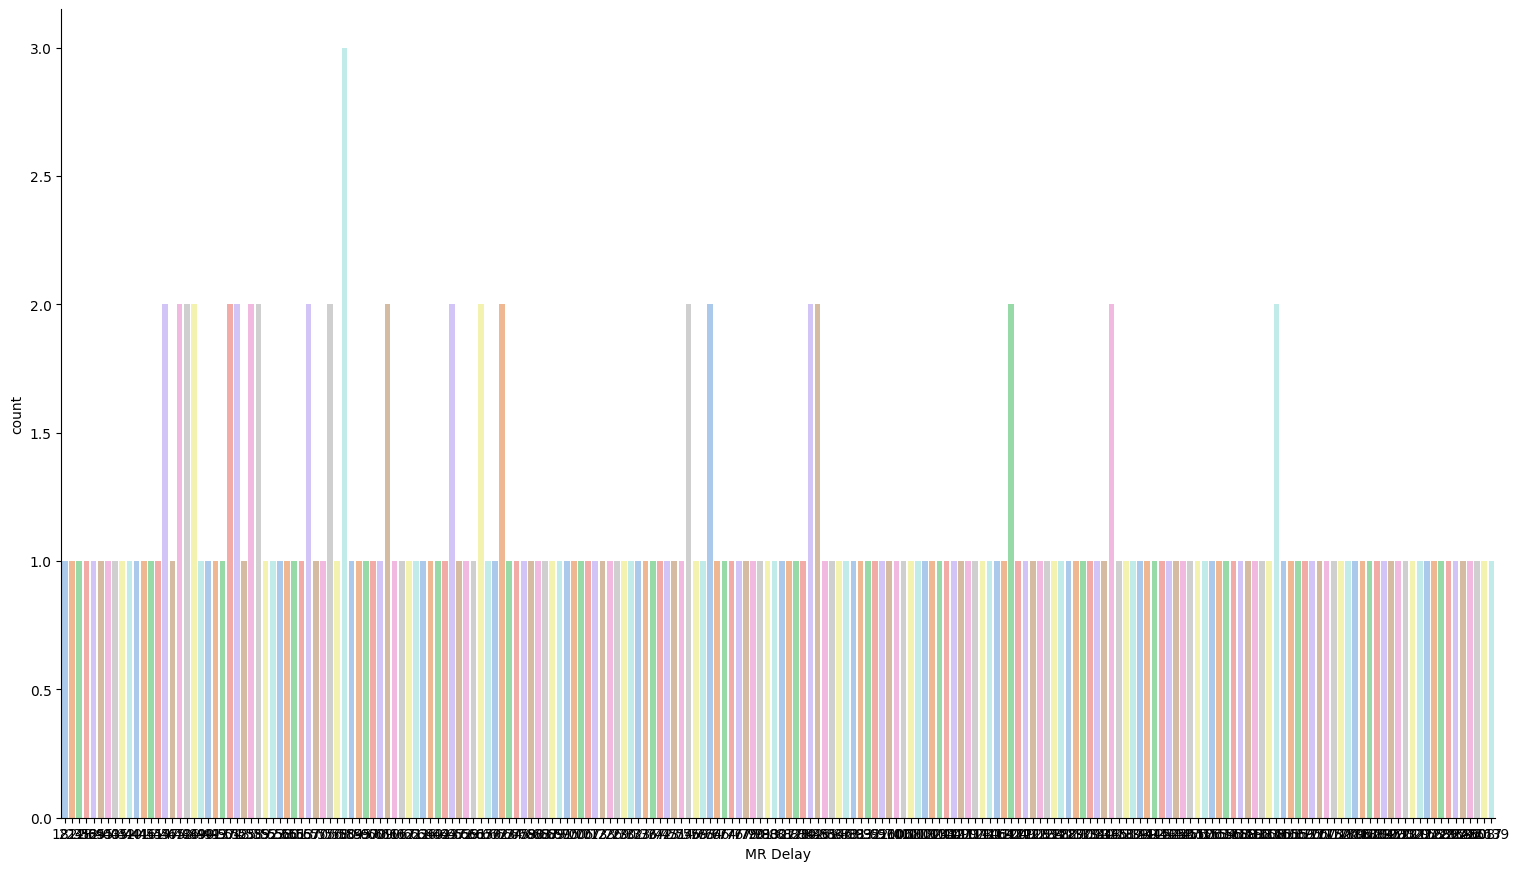

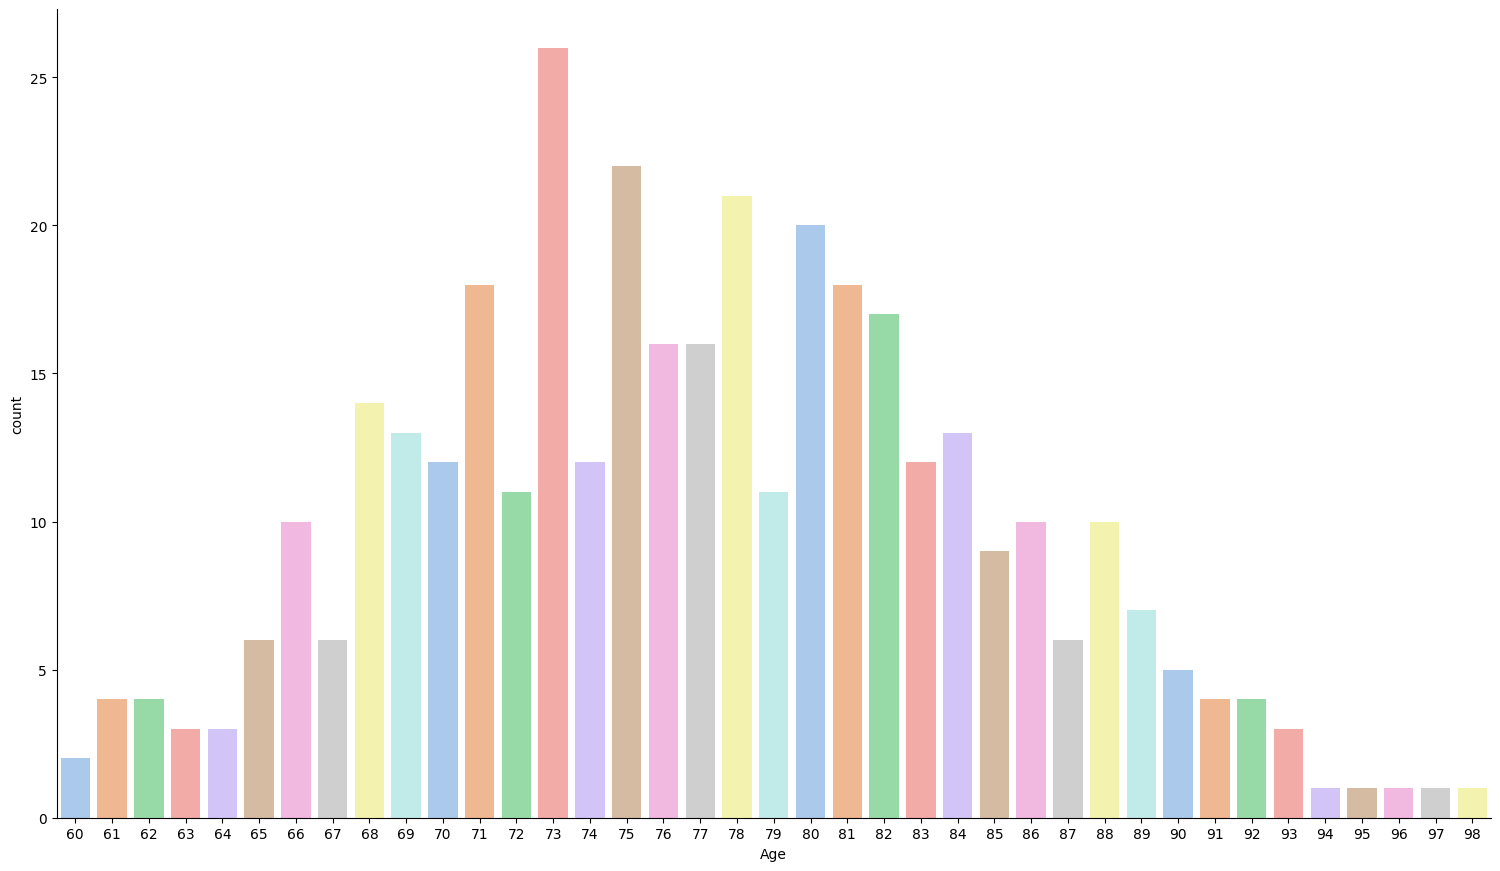

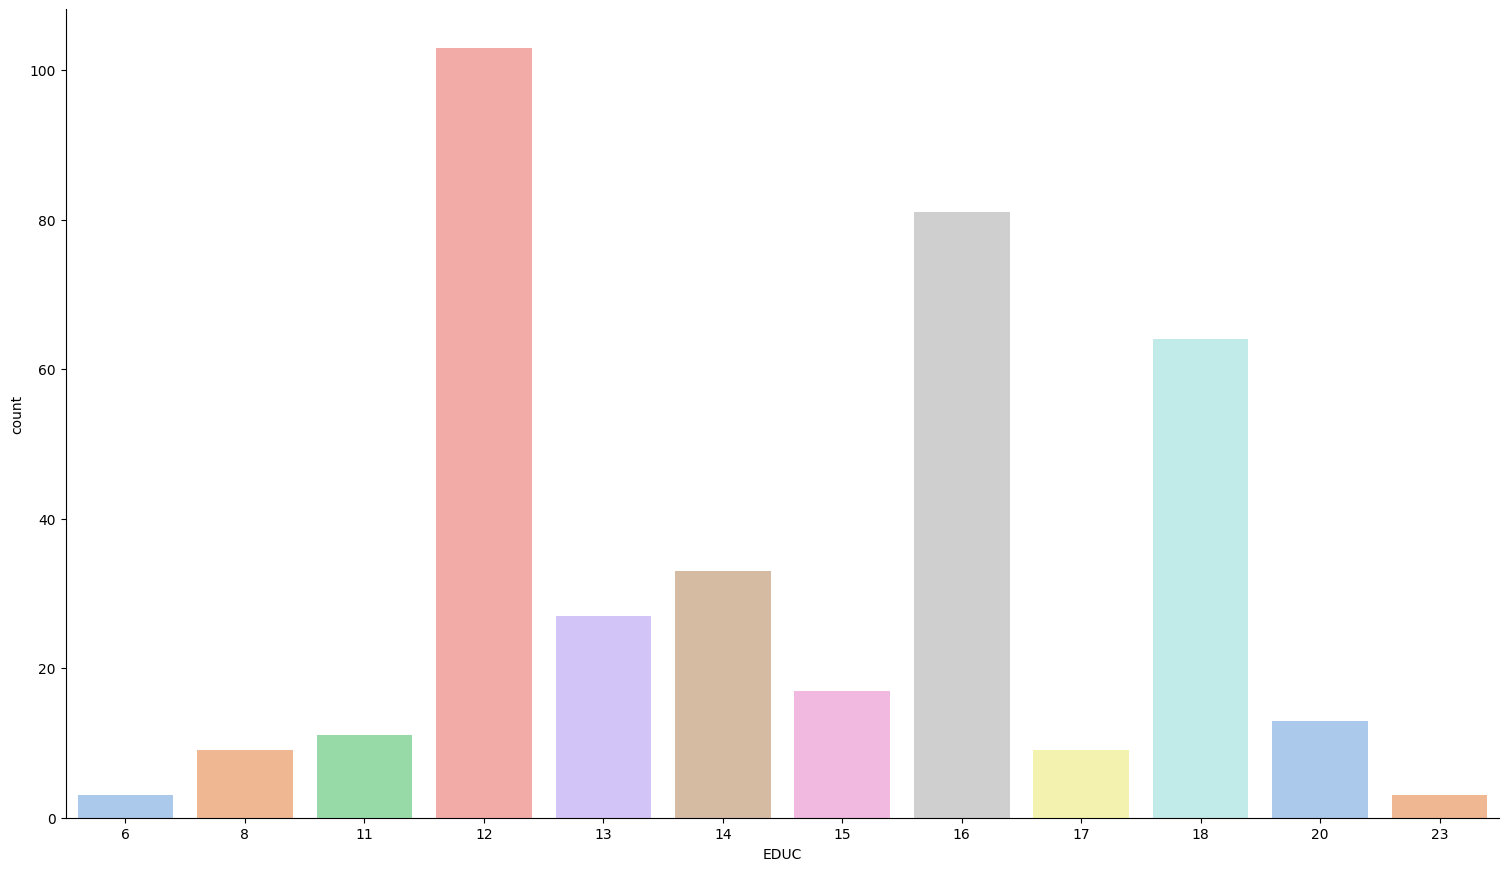

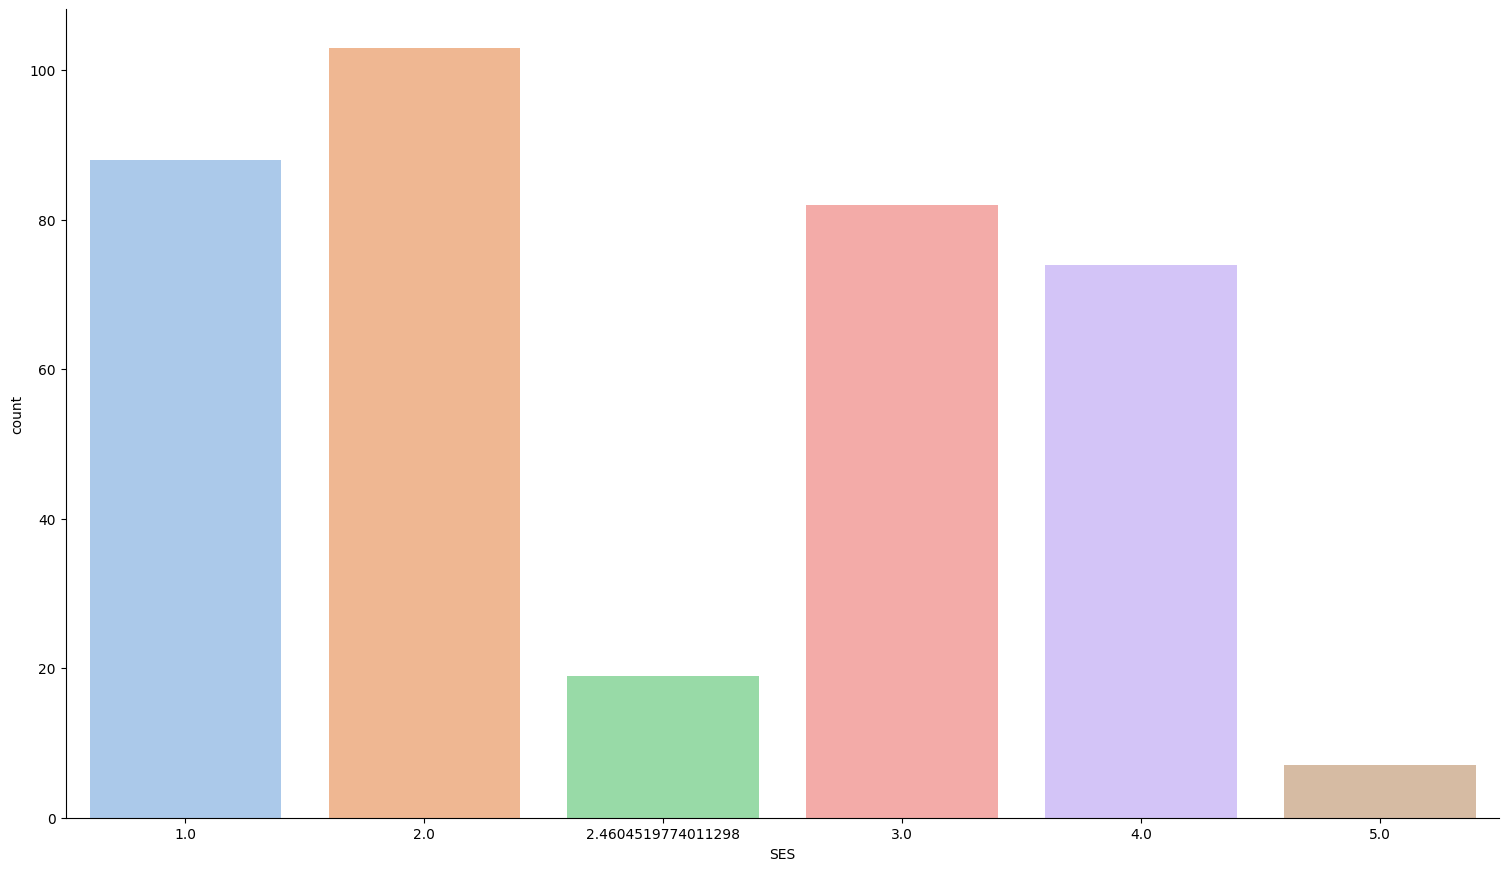

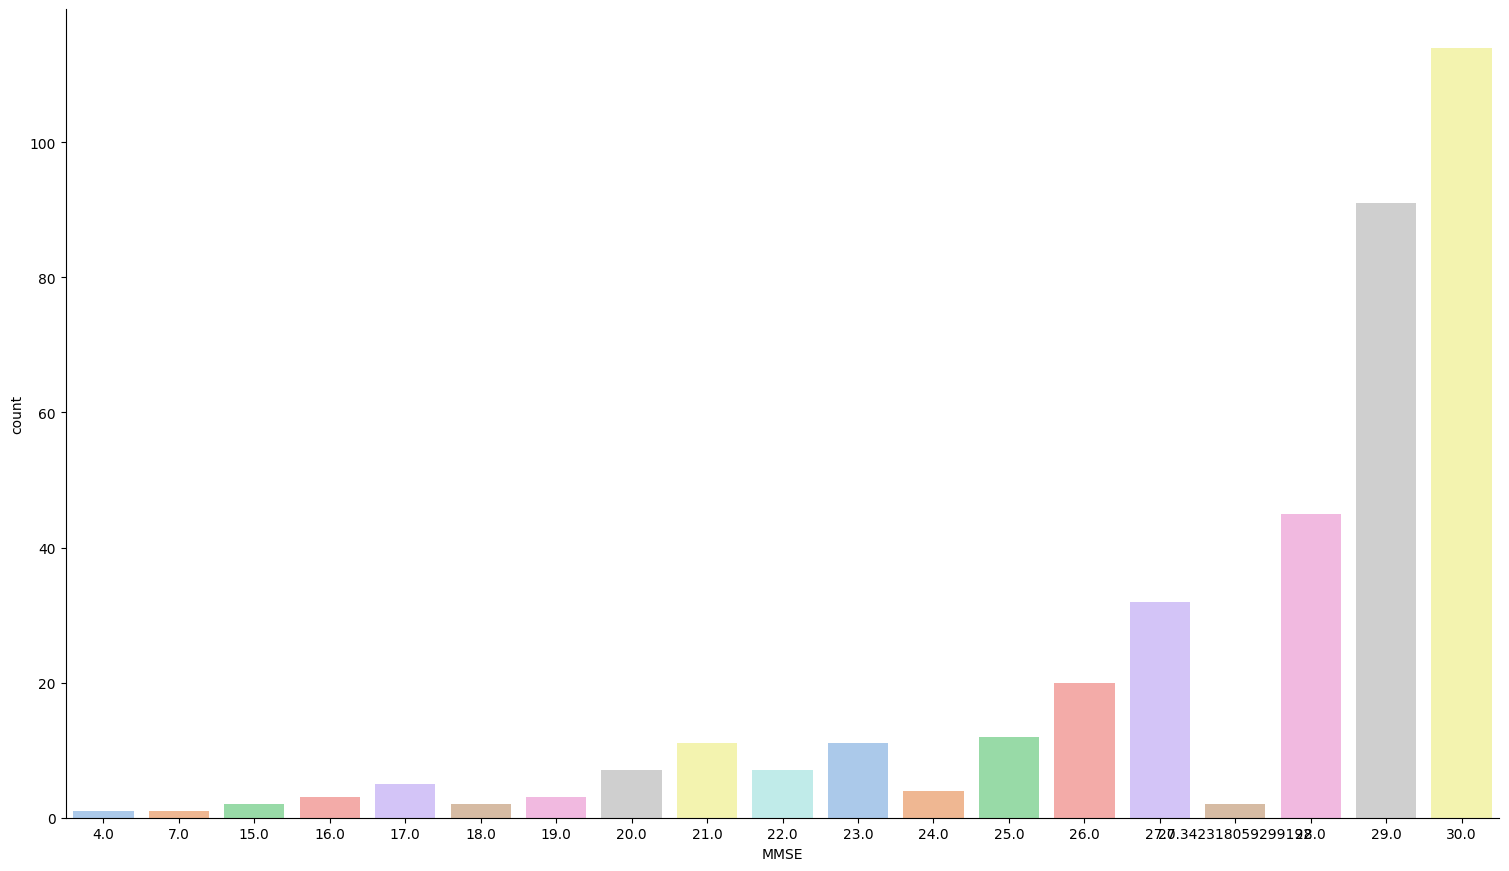

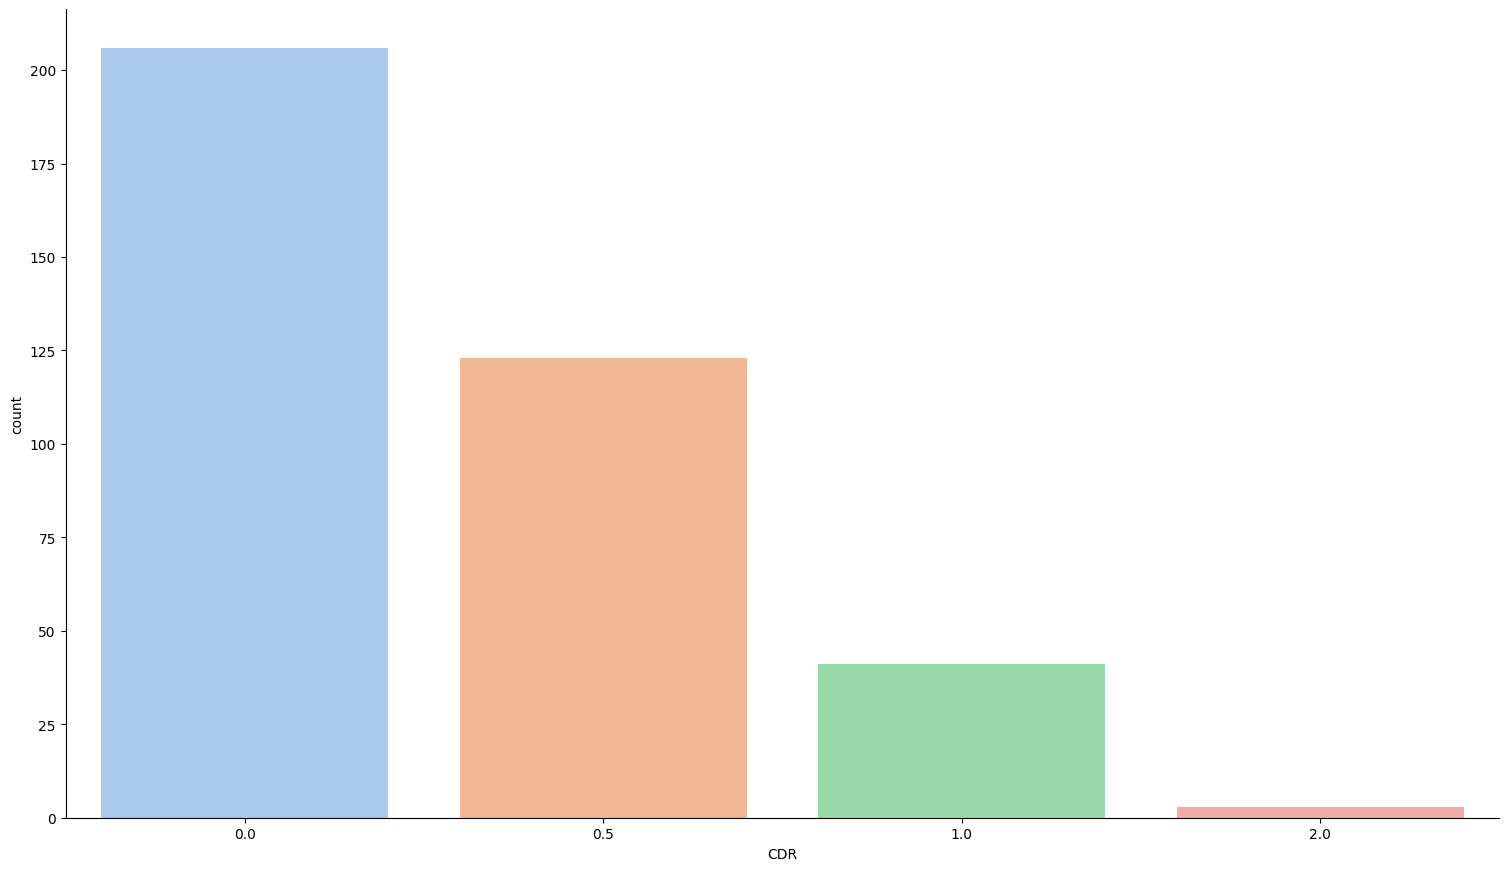

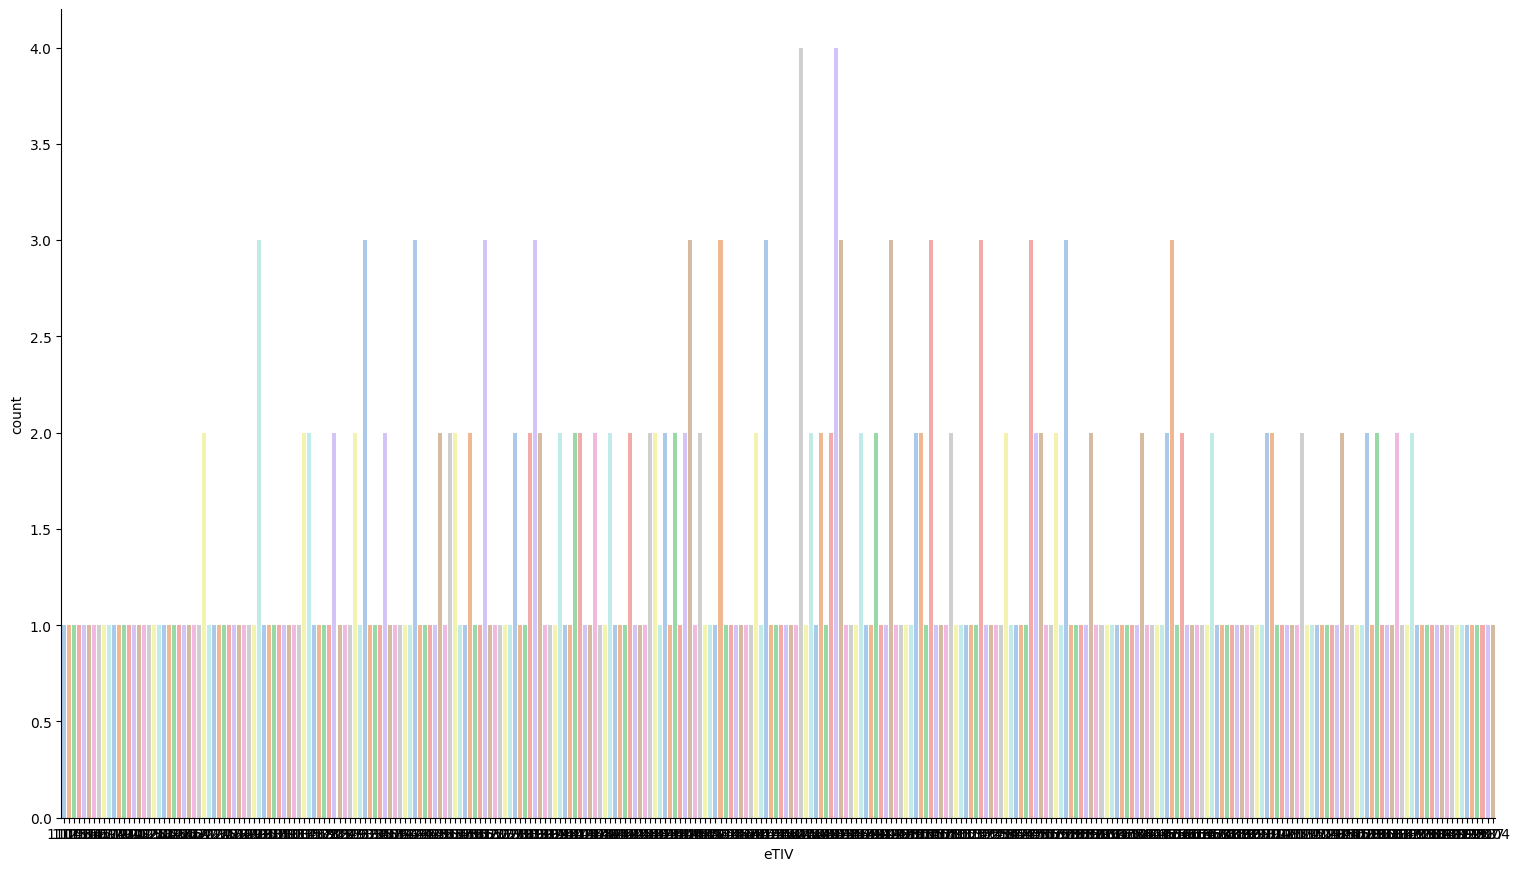

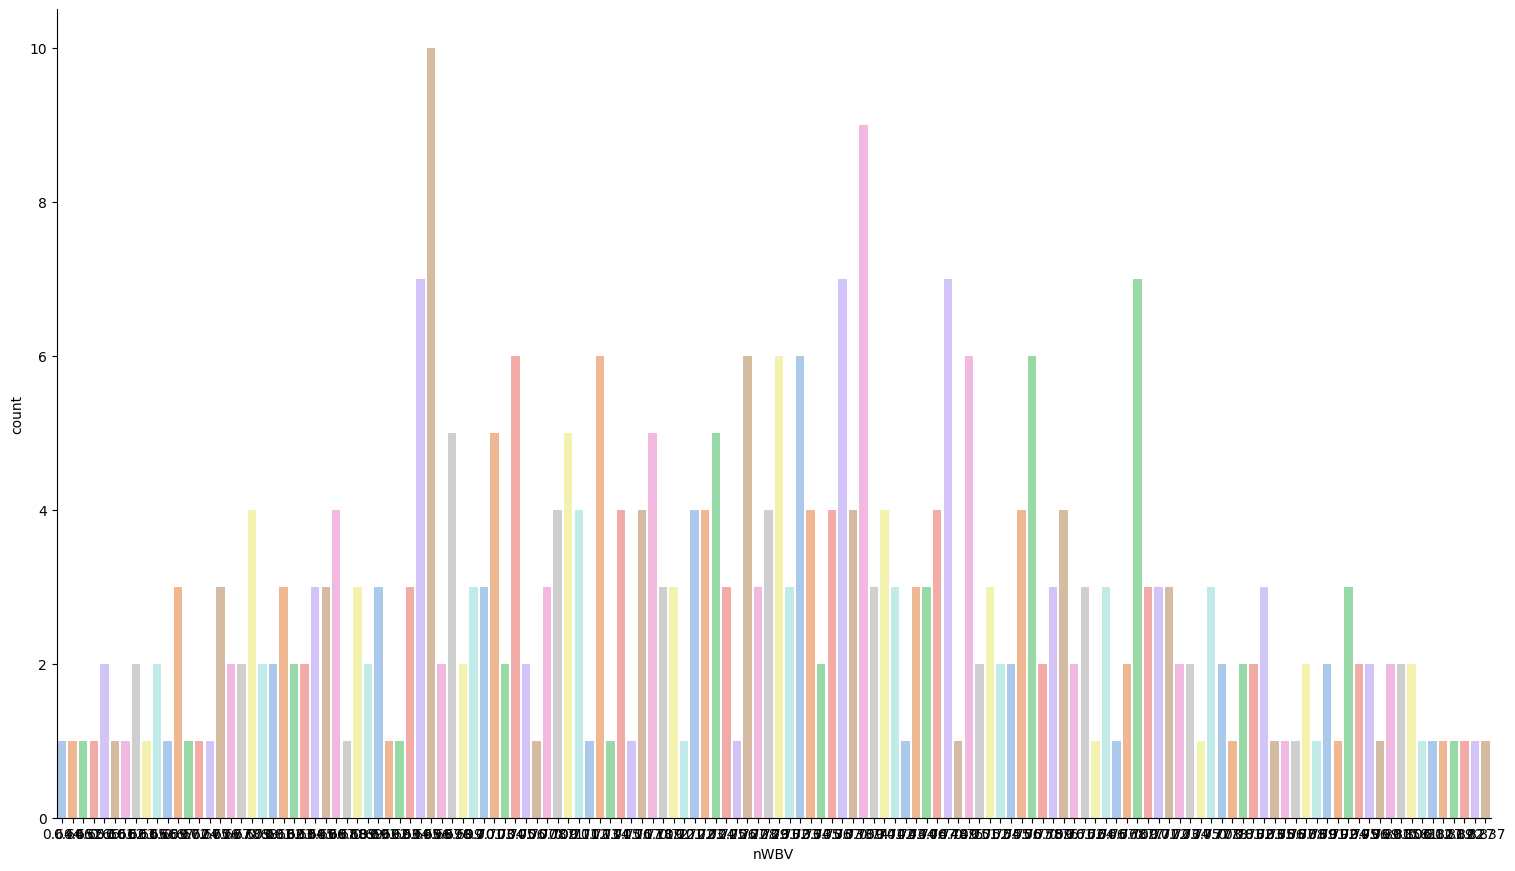

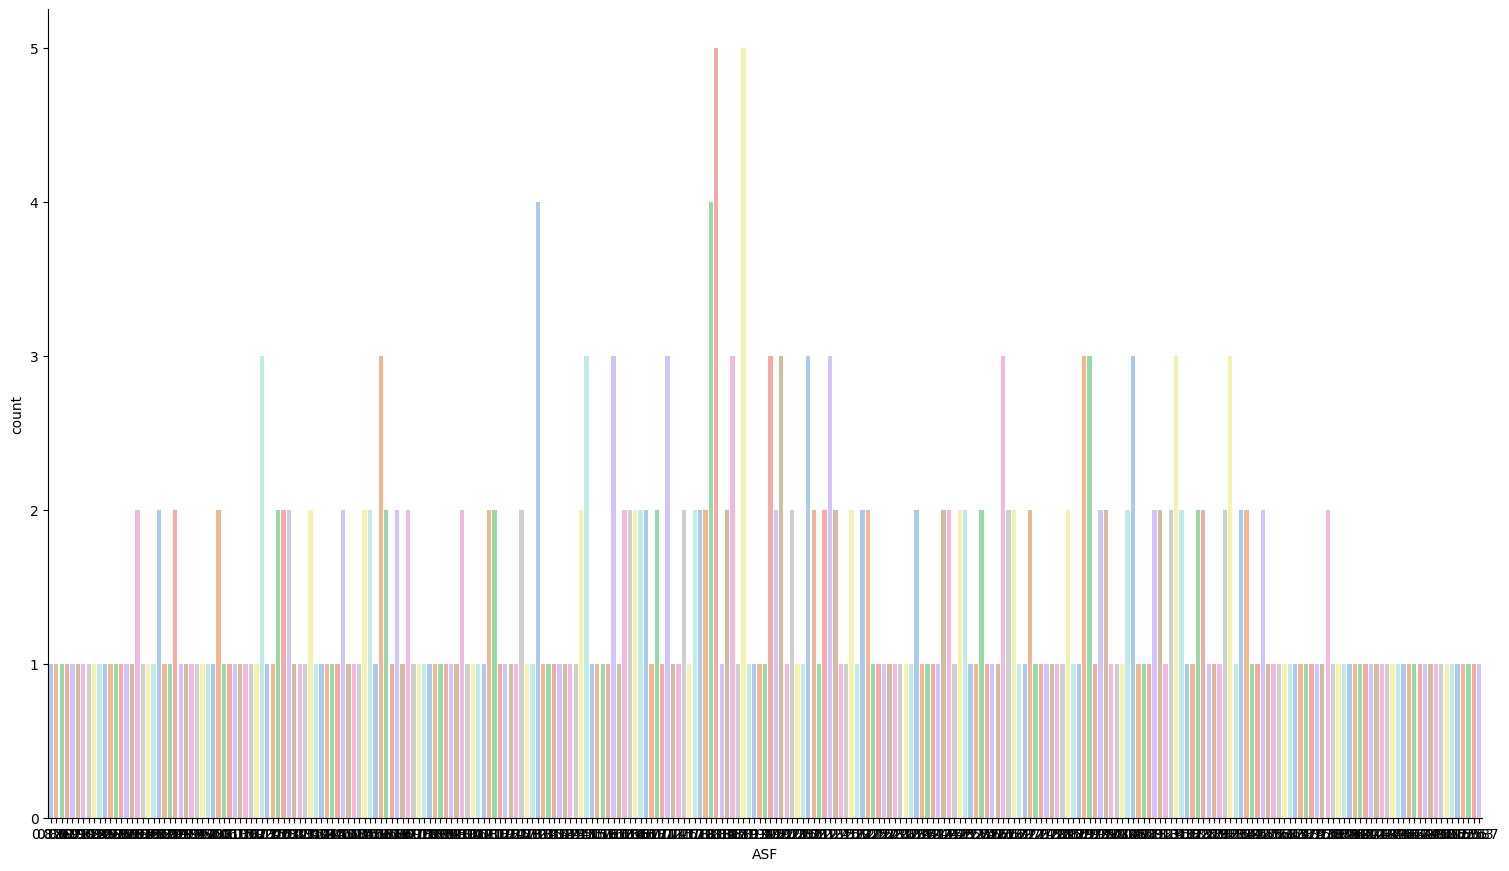

In [13]:
generate_chars("M/F")
generate_chars("Hand")
generate_chars("MR Delay")
generate_chars("Age")
generate_chars("EDUC")
generate_chars("SES")
generate_chars("MMSE")
generate_chars("CDR")
generate_chars("eTIV")
generate_chars("nWBV")
generate_chars("ASF")


### detect outlier

In [14]:
import numpy as np

def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [15]:
# detect outliers

list_atributes = ["M/F", "MR Delay", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]
for item in list_atributes:
    print(outliers_z_score(df_long[item]))

(array([], dtype=int64),)
(array([ 75, 160, 265]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([ 26,  89, 100, 101, 172, 173, 251]),)
(array([184, 251, 330]),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [16]:
df_long_numerical = df_long.iloc[:, 2:]
df_long_numerical.corr()


,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.095507,-0.120638,0.222146,NaN,-0.005941,-0.193060,0.060697,-0.523305,0.778049,-0.042700,-0.311346,0.032495
Visit,-0.095507,1.000000,0.920009,0.069791,NaN,0.183213,0.024615,-0.050422,-0.029020,0.002325,0.117428,-0.126682,-0.120399
MR Delay,-0.120638,0.920009,1.000000,0.048006,NaN,0.205357,0.051630,-0.030258,0.065786,-0.062915,0.119624,-0.105586,-0.123545
M/F,0.222146,0.069791,0.048006,1.000000,NaN,-0.037726,0.089279,-0.044525,-0.166521,0.202140,0.572549,-0.249618,-0.561647
Hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.005941,0.183213,0.205357,-0.037726,NaN,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,-0.193060,0.024615,0.051630,0.089279,NaN,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,0.060697,-0.050422,-0.030258,-0.044525,NaN,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,-0.523305,-0.029020,0.065786,-0.166521,NaN,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,0.778049,0.002325,-0.062915,0.202140,NaN,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340


<Axes: >

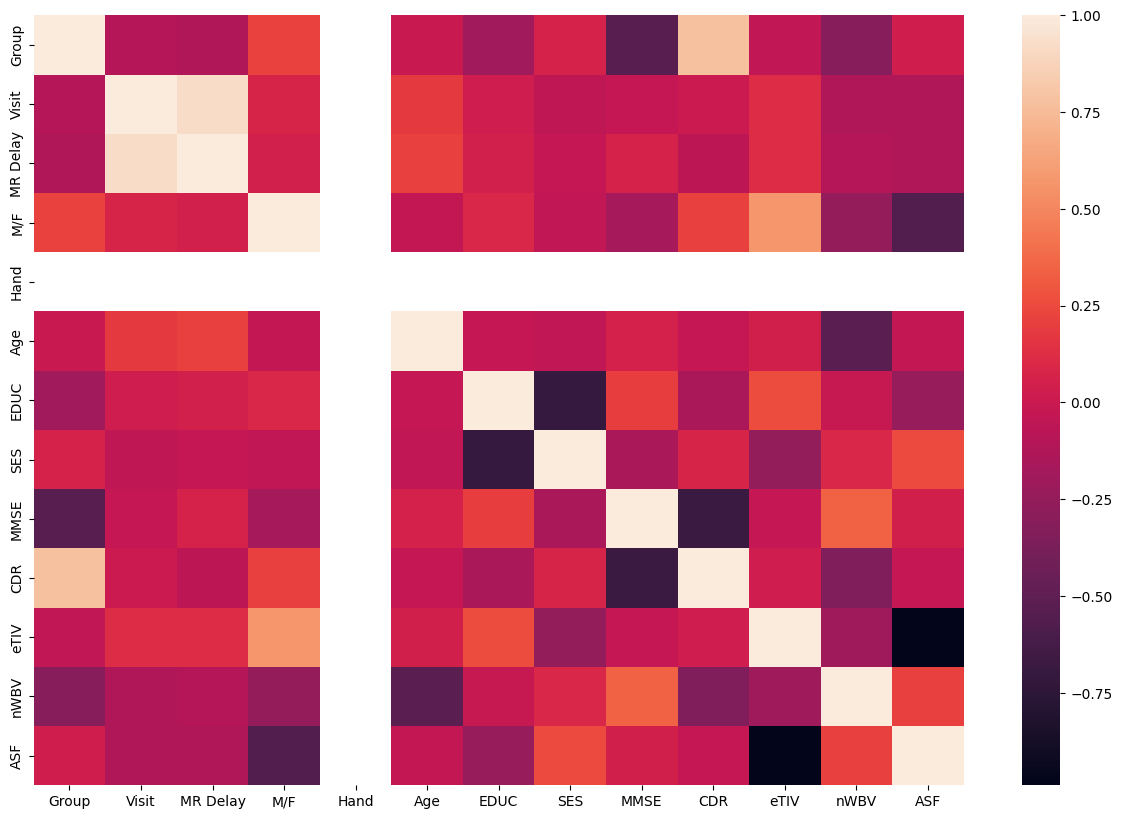

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

corr_matrix = df_long_numerical.corr()
rcParams['figure.figsize'] = 15, 10
sns.heatmap(corr_matrix)

In [18]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))
    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df_long[feature_col_names].values
y = df_long[predicted_class_names].values

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [20]:
print("{0:0.2f}% para Treinamento".format((len(X_train)/len(df_long.index)) * 100))
print("{0:0.2f}% para Testes".format((len(X_test)/len(df_long.index)) * 100))

69.97% para Treinamento
30.03% para Testes


In [21]:
print("Original Demented : {0} ({1:0.2f}%)".format(len(df_long.loc[df_long['Group'] == 1]), 100 * (len(df_long.loc[df_long['Group'] == 1]) / len(df_long))))
print("Original Nondemented : {0} ({1:0.2f}%)".format(len(df_long.loc[df_long['Group'] == 0]), 100 * (len(df_long.loc[df_long['Group'] == 0]) / len(df_long))))
print("")
print("Training Demented : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 100 * (len(y_train[y_train[:] == 1]) / len(y_train))))
print("Training Nondemented : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 100 * (len(y_train[y_train[:] == 0]) / len(y_train))))
print("")
print("Test Demented : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 100 * (len(y_test[y_test[:] == 1]) / len(y_test))))
print("Test Nondemented : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 100 * (len(y_test[y_test[:] == 0]) / len(y_test))))

Original Demented : 183 (49.06%)
Original Nondemented : 190 (50.94%)

Training Demented : 123 (47.13%)
Training Nondemented : 138 (52.87%)

Test Demented : 60 (53.57%)
Test Nondemented : 52 (46.43%)


Feature ranking:

1. feature Age (30.531515)
2. feature EDUC (24.317091)
3. feature M/F (19.061637)
4. feature SES (4.474665)
5. feature CDR (4.419690)
6. feature eTIV (4.407907)
7. feature ASF (4.337000)
8. feature nWBV (4.289506)
9. feature MMSE (4.160989)


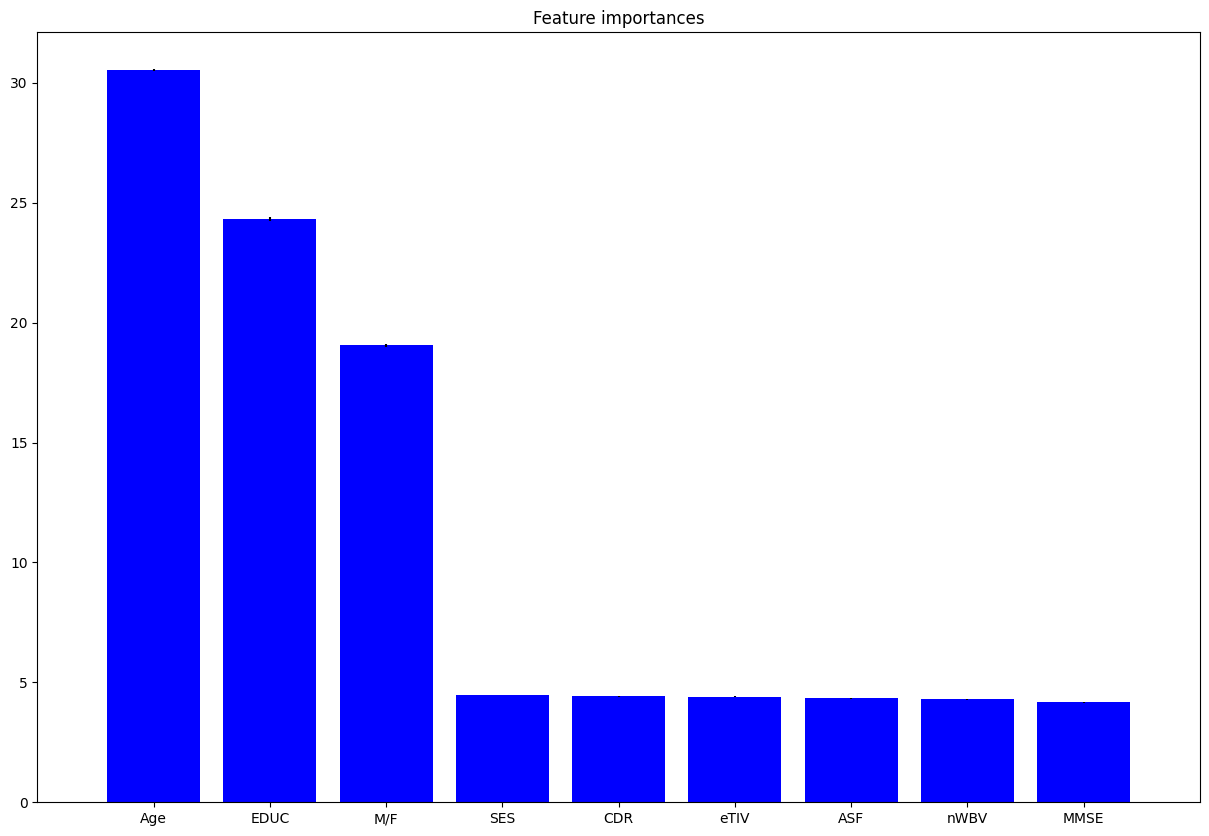

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=len(feature_col_names),
                           n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_*100
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:\n")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_col_names[indices[f]], importances[indices[f]]))

col_name = lambda x: feature_col_names[indices[x]]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), list(map(col_name, range(X.shape[1]))))  # Corrected line
plt.xlim([-1, X.shape[1]])
plt.show()